In [3]:
import pandas as pd
import lightkurve as lk

aavso_lightcuvre = pd.read_csv("\\Users\\kterp\\OneDrive\\Documents\\GitHub\\CV-Analyzer\\Temporary Files\\aavso_data.csv") 

aavso_lightcuvre = aavso_lightcuvre.rename(columns={'JD': 'time', 'Magnitude': 'flux'})
aavso_lightcuvre['flux_err'] = 0

# Convert flux to numeric, removing non-float values
aavso_lightcuvre['flux'] = pd.to_numeric(aavso_lightcuvre['flux'], errors='coerce')
aavso_lightcuvre = aavso_lightcuvre.dropna(subset=['flux'])
aavso_lightcuvre['flux'] = aavso_lightcuvre['flux'].astype(float)

aavso_lightcuvre

,time,flux,flux_err
0,2.457860e+06,16.178,0
1,2.457860e+06,16.217,0
2,2.457860e+06,16.254,0
3,2.457860e+06,16.151,0
4,2.457860e+06,16.111,0
...,...,...,...
40069,2.457900e+06,16.877,0
40070,2.457900e+06,16.847,0
40071,2.457900e+06,16.889,0
40072,2.457900e+06,16.785,0


In [4]:
lc = {
    "time" : aavso_lightcuvre['time'],
    "flux" : aavso_lightcuvre['flux'],
    "flux_err" : aavso_lightcuvre['flux_err']
}

In [5]:
lightcurve = lk.LightCurve(lc)

<Axes: xlabel='Phase [JD]', ylabel='Flux'>

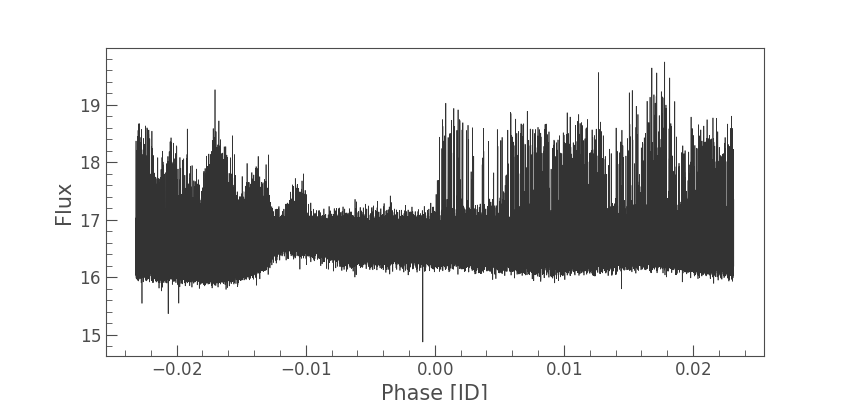

In [6]:
%matplotlib widget
lightcurve.fold(period = 0.0463).plot()

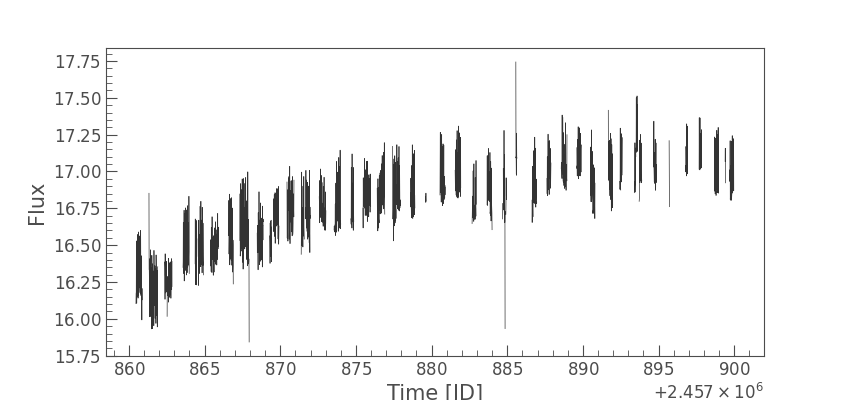

In [7]:
def bin(lightcurve: lk.LightCurve):
    lightcurve.bin(time_bin_size=0.01).plot()

bin(lightcurve)